# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [1]:
import pandas as pd
import xlwings as xw

In [20]:
recipes = pd.read_csv('recipes_sample.csv', delimiter=',')
recipes = recipes.drop(columns = ['n_steps', 'contributor_id'])
reviews = pd.read_csv('reviews_sample.csv', delimiter=',')
recipes

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


In [21]:
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [22]:
import random

In [23]:
ind_1 = random.sample(list(recipes.index), int(0.05*len(recipes))) 
ind_2 = random.sample(list(reviews.index), int(0.05*len(reviews))) 
data_1 = []
data_2 = []
for i in sorted(ind_1):
    data_1.append(recipes.iloc[i])
short_recipes = pd.DataFrame(data_1)
for i in sorted(ind_2):
    data_2.append(reviews.iloc[i])
short_reviews = pd.DataFrame(data_2)
short_recipes

,name,id,minutes,submitted,description,n_ingredients
11,250 00 chocolate chip cookies,118843,20,2005-04-24,these are great! the perfect name for them!,13.0
35,windy s sweet and sour meatballs,276594,50,2008-01-05,whenever we had a potluck lunch at the office ...,14.0
44,emerald ecstasy green smoothie,342619,6,2008-12-09,this is the delicious green smoothie recipe th...,6.0
54,little kick jalapeno burgers,371549,16,2009-05-12,this recipe was originally submitted to taste ...,14.0
71,we re going bananas bread,198343,72,2006-11-29,"another all time household favorite from ""the ...",10.0
...,...,...,...,...,...,...
29896,ziti eggplant and fontina gratin,314232,50,2008-07-17,eggplant is sauteed in olive oil and cooking s...,9.0
29912,zucchini basil muffins,378410,30,2009-06-23,from just hungry - they adapted it from bernar...,10.0
29928,zucchini cobbler,99481,70,2004-09-09,"if you don't tell it is zucchini, people will ...",7.0
29935,zucchini friendship bread,322225,75,2008-08-29,if you're sick of making the same bread every ...,14.0


In [24]:
short_reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
16,688527,26885,21171,2005-07-11,5,I have never put apple sauce and orange juice ...
40,1065960,939002,13707,2011-10-12,3,I give this recipe a 3.5 stars. It was okay a...
71,518788,1352950,54715,2009-09-01,4,A good recipe using staples from the kitchen. ...
138,1021677,104472,272020,2009-05-07,5,This is a wonderful recipe. I was hesitant to ...
147,135916,538491,16718,2007-12-06,5,My first attempt at tamales. The masa turned ...
...,...,...,...,...,...,...
126551,675751,151679,286041,2008-09-15,5,Scancan is the greatest cook ever! This is th...
126595,972320,1191355,512728,2014-02-09,4,"Because of the health benefits, I am trying to..."
126604,246528,160974,115110,2005-11-30,5,I made this on the spur of the moment. It only...
126622,1044897,1925885,504814,2013-08-16,5,"Jackie, you&#039;ve done it again! This is a ..."


In [25]:
with pd.ExcelWriter('recipes.xlsx') as writer:
    short_recipes.to_excel(writer, sheet_name='Рецепты')
    short_reviews.to_excel(writer, sheet_name='Отзывы')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [26]:
seconds = (short_recipes.minutes)*60
book_recipes = xw.Book('recipes.xlsx')
sht_rvw = book_recipes.sheets['Отзывы']
sht_rcp = book_recipes.sheets['Рецепты']
sht_rcp.range('H1').value = 'seconds_assign'

In [27]:
sht_rcp.range('H2').options(transpose=True).value = seconds.values

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [28]:
sht_rcp.range('I1').value = 'seconds_formula'
sht_rcp.range('I2:I1501').value = "=D2*60"

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [29]:
#расширяем столбцы, чтобы было видно выравнивание по центру
book_recipes.activate('Рецепты')
new_col = xw.Range('H1:I1')
new_col.columns[0].column_width = 30
new_col.columns[1].column_width = 30

In [30]:
#выравнивание названий новых столбцов по центру
sht_rcp.range('H1:I1').api.HorizontalAlignment = -4108

In [31]:
#полужирный шрифт
sht_rcp.range('H1:I1').api.Font.Bold = True

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [32]:
#не придумал как обойтись без цикла
for i in range(2,1502):
    if int(sht_rcp.range((i, 4)).value) < 5:
        sht_rcp.range((i, 4)).color = (25, 200, 20)
    elif 5 <= int(sht_rcp.range((i, 4)).value) <= 10:
        sht_rcp.range((i, 4)).color = (255, 226, 83)
    else:
        sht_rcp.range((i, 4)).color = (240, 30, 30)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [33]:
sht_rcp.range('J1').value = 'n_reviews'
sht_rcp.range('J1').api.Font.Bold = True
xw.Range('J1').columns[0].column_width = 30
sht_rcp.range('J1').api.HorizontalAlignment = -4108

In [34]:
sht_rcp.range('J2:J1501').formula = "=COUNTIF(Отзывы!$D$2:$D$6335,Рецепты!C2)"

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [36]:
book_recipes.sheets["Отзывы"].activate()
def validate():
    global rcp
    res = []
    rating = sht_rvw['F2:F6335'].value
    rcp_id = sht_rvw['D2:D6335'].value
    for i in range(6334):
        if 0 <= rating[i] <= 5:
            if rcp_id[i] in rcp:
                res.append(0)
            else:
                res.append(1)
        else:
            res.append(1)
    for i in range(6334):
        if res[i] == 1:
            sht_rvw.range((i+2, 1)).expand('right').color = (255, 0, 0)
    

rcp = sht_rcp['C2:C1501'].value 
validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [37]:
import csv

In [38]:
#считывание файла
csv_file = open('recipes_model.csv', encoding='utf-8')
csv_reader = csv.reader(csv_file, delimiter=';')
data_3 = []
for i in csv_reader:
    row = str(*i).split('\t')
    data_3.append(row)
    tmp = []
    tmp_row = row.copy()
    for j in range(len(tmp_row)):
        if tmp_row[j] == '':
            tmp.append(j)
    if len(tmp) > 0:
        del tmp_row[tmp[0]:(tmp[-1] + 1)]
    print(tmp_row)

['recipe', 'name', 'varchar(100)', 'Y', 'Рецепт', 'Название рецепта']
['recipe', 'id', 'serial', 'N', 'Рецепт', 'ID рецепта', 'PK']
['recipe', 'minutes', 'int', 'Y', 'Рецепт', 'Длительность выполнения в минутах']
['recipe', 'contributor_id', 'int', 'Y', 'Рецепт', 'ID автора рецепта', 'FK', 'user', 'id']
['recipe', 'submitted', 'timestamp', 'Y', 'Рецепт', 'Дата добавления']
['recipe', 'n_steps', 'int', 'N', 'Рецепт', 'Кол-во шагов рецепта']
['recipe', 'description', 'text', 'N', 'Рецепт', 'Описание рецепта']
['recipe', 'n_ingredients', 'int', 'N', 'Рецепт', 'Кол-во ингредиентов в рецепта']
['review', 'id', 'serial', 'Y', 'Отзыв', 'ID отзыва', 'PK']
['review', 'user_id', 'int', 'Y', 'Отзыв', 'ID автора отзыва', 'FK']
['review', 'recipe_id', 'int', 'Y', 'Отзыв', 'ID рецепта', 'FK', 'recipe', 'id']
['review', 'date', 'timestamp', 'Y', 'Отзыв', 'Дата добавления отзыва']
['review', 'rating', 'int', 'Y', 'Отзыв', 'Рейтинг отзыва']
['review', 'review', 'test', 'N', 'Отзыв', 'Текстовое описание

In [39]:
#запись в файл
book_new_recipes = xw.Book('recipes_model.xlsx')
sht_mod = book_new_recipes.sheets.add(name = "Модель")

In [40]:
sht_mod.range('A2').expand('table').options(ndim = 2).value = data_3

In [41]:
headers = ['Таблица', 'Столбец', 'Тип данных', 'Обязательно к заполнению', 'Таблица (название)', 'Описание', 'Ключ', 'Ссылка на таблицу', 'Соответствующий столбец']
sht_mod.range('A1').expand('right').value = headers

#### Скриншот получившегося листа:
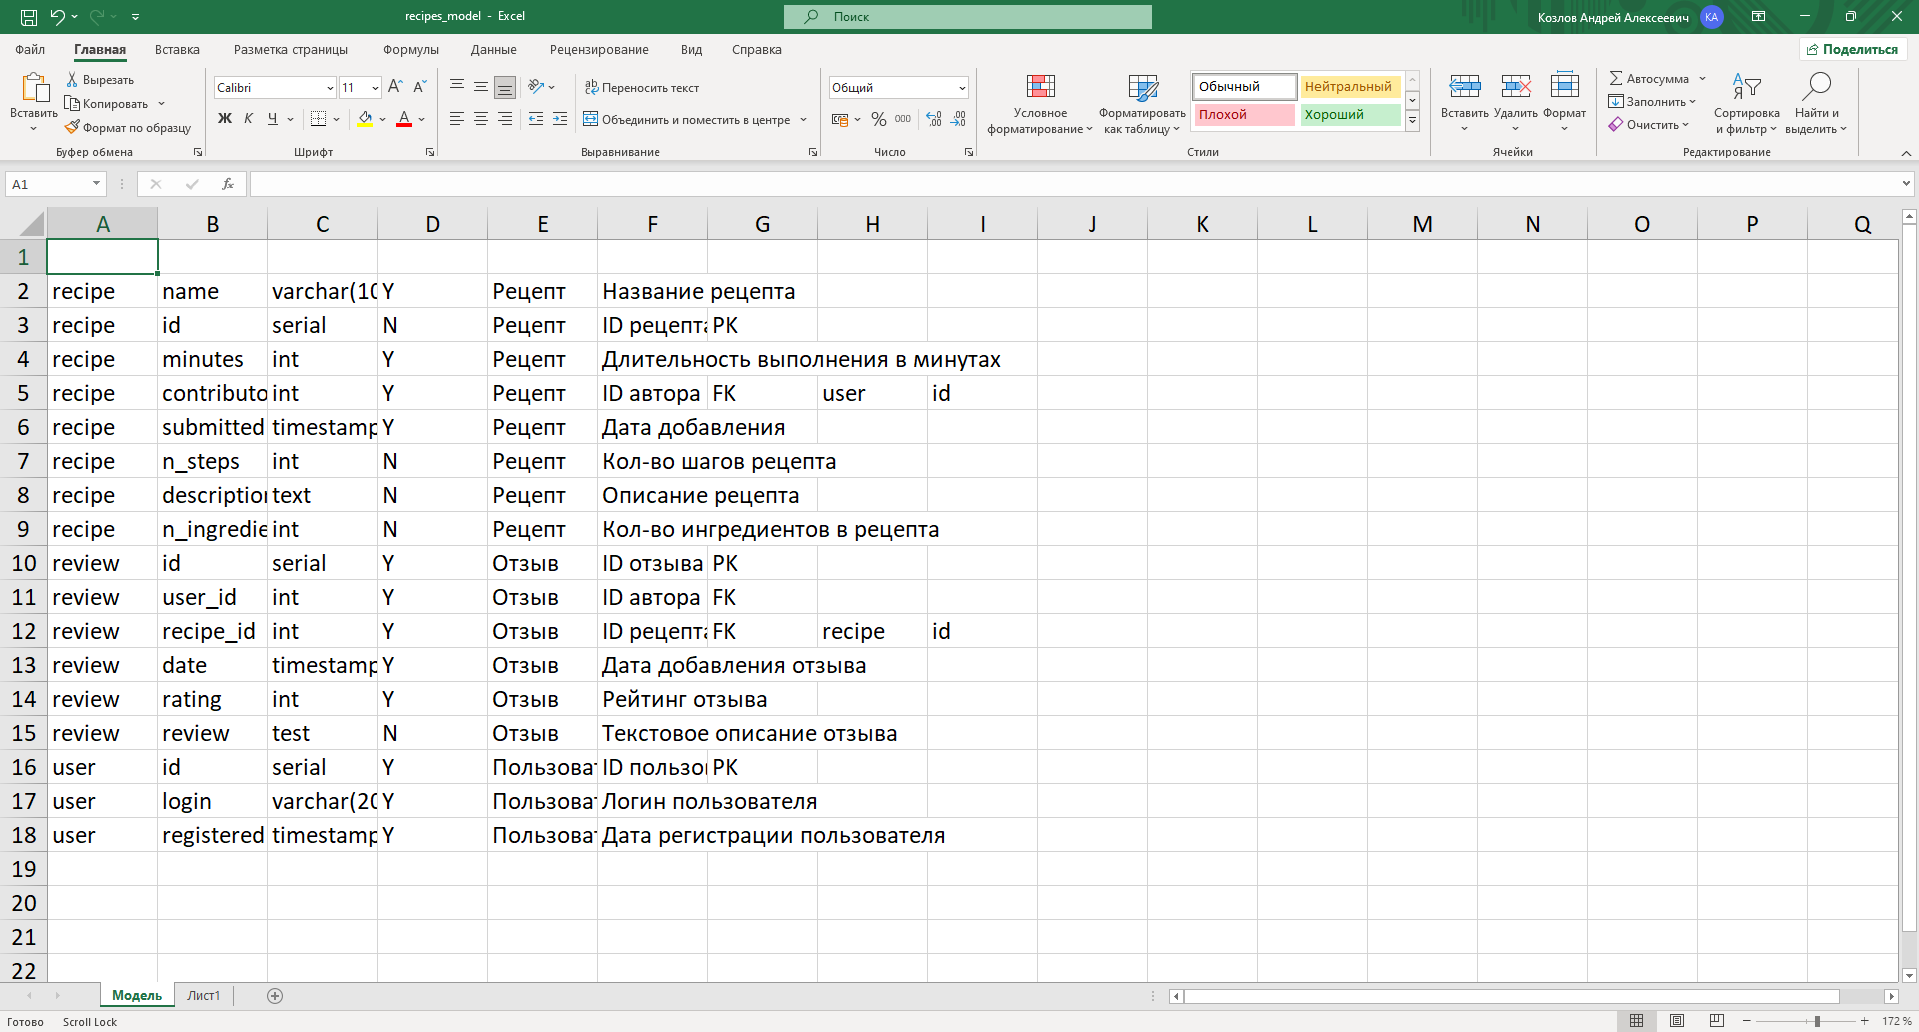

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [42]:
sht_mod.range('J2:J18').value = '=B2&" "&UPPER(C2)&" "&IF(G2="PK", "PRIMARY KEY", IF(G2="FK","REFERENCES "&H2&"("&I2&")", ""))&" "&IF(AND(G2<>"PK", D2="Y"),"NOT NULL", "")'

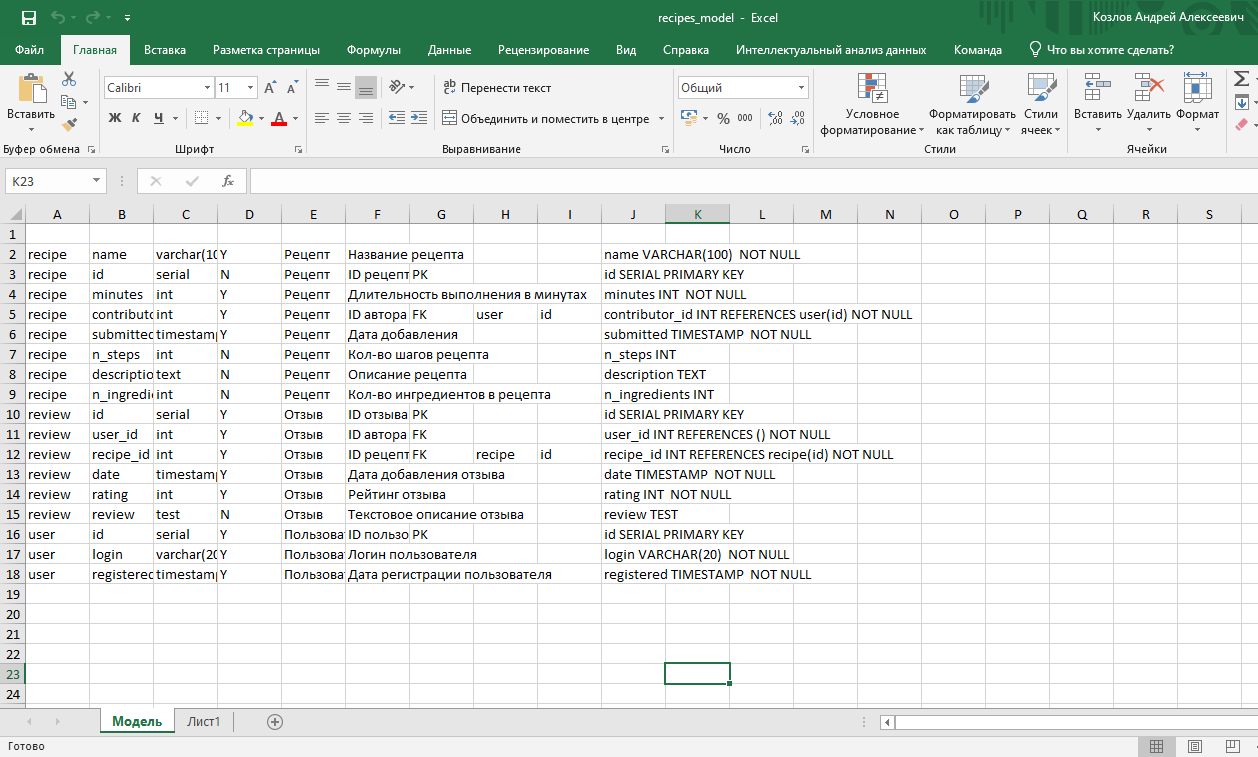

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [43]:
sht_mod.range('A1').expand('right').color = '00ccff'
sht_mod.range('A1').expand('right').columns.autofit()
sht_mod.range('A1').expand('right').api.Font.Bold = True
sht_mod.range('A1').expand('right').api.AutoFilter(Field:=1)

True

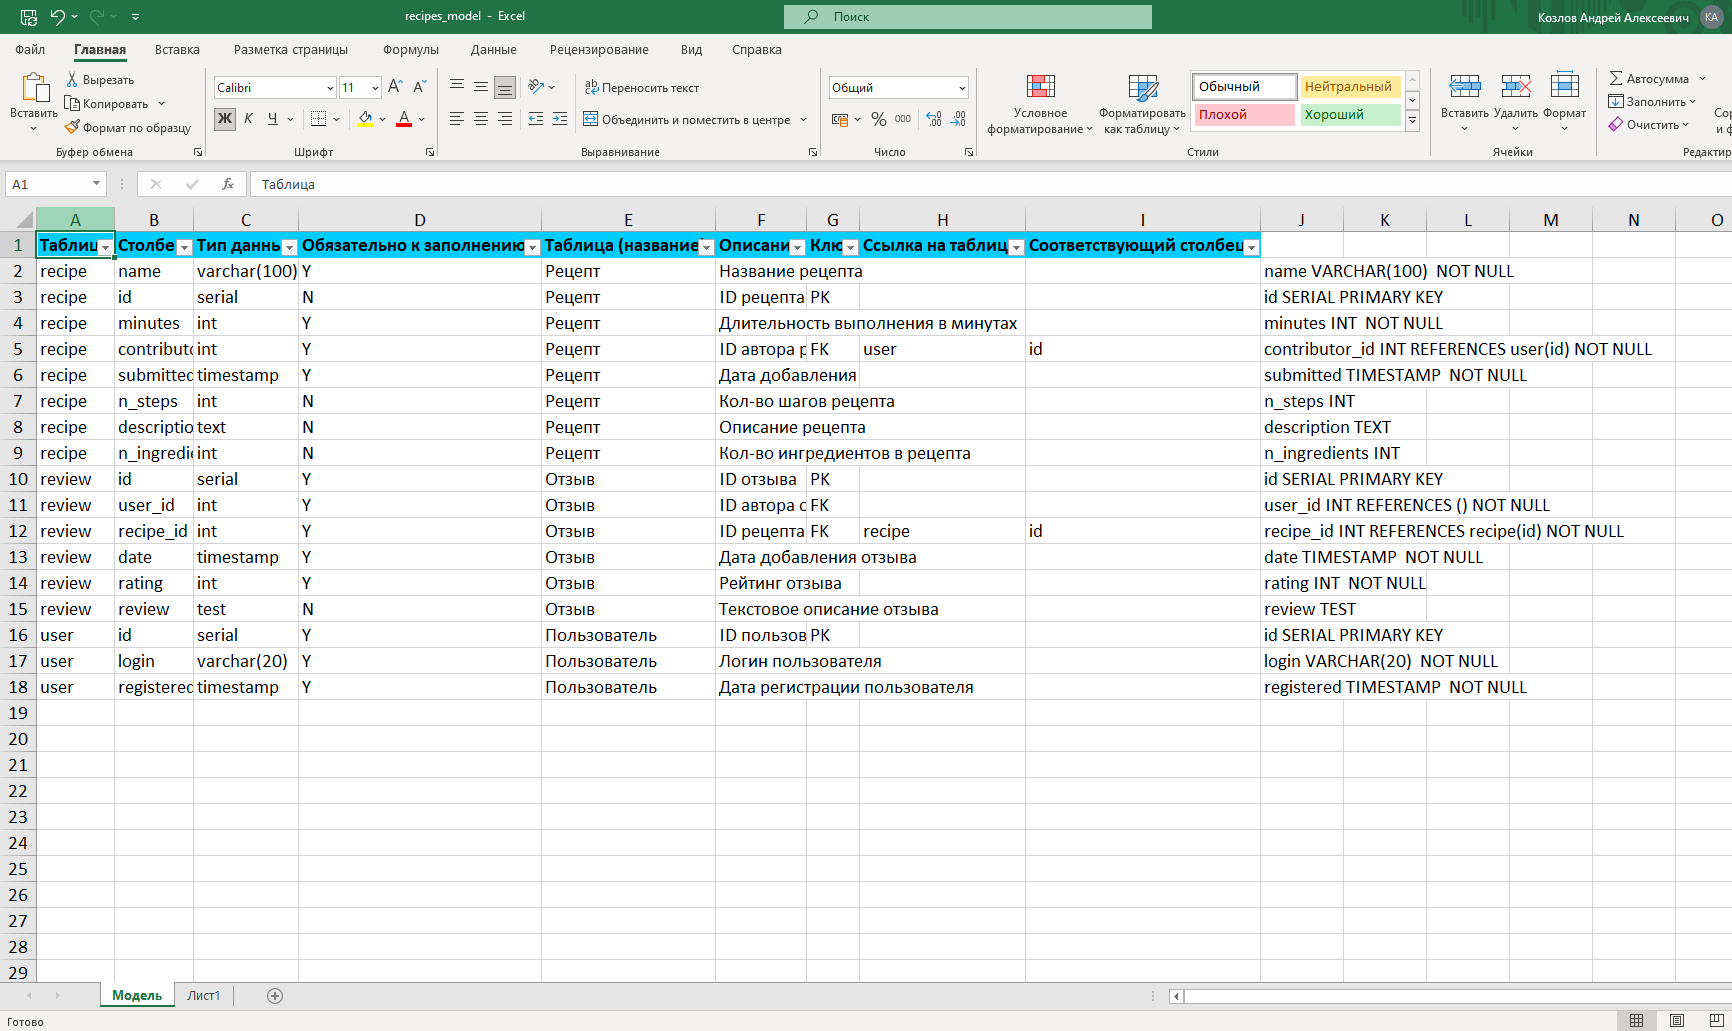

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [44]:
sht_stat = book_new_recipes.sheets.add(name = "Статистика")

In [45]:
headers = ['recipe', 'review',  'user']
sht_stat.range('A1').value = headers
sht_stat.range('A1').expand('right').api.Font.Bold = True
sht_stat.range('A1').expand('right').color = 'A8E4A0'
sht_stat.range('A2:C2').value = '=COUNTIF(Модель!$A$2:$A$100,Статистика!A1)'

In [46]:
columns = sht_stat.range('A1').expand('right').value
data = sht_stat.range('A2').expand('right').options(ndim = 2).value
df1 = pd.DataFrame(data = data, columns = columns)
df1

,recipe,review,user
0,8.0,6.0,3.0


<BarContainer object of 3 artists>

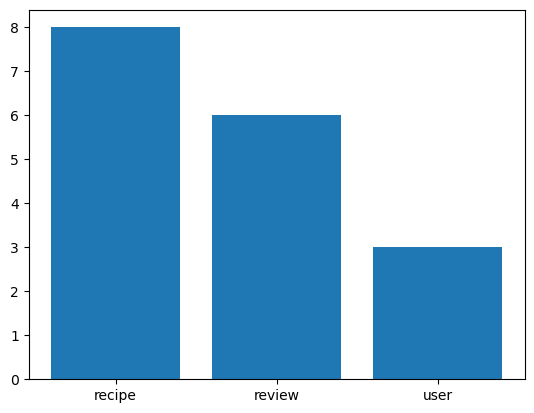

In [47]:
#Визуализация
import matplotlib
brplt = matplotlib.pyplot.figure()
matplotlib.pyplot.bar(list(df1.columns), list(*df1.values));

In [48]:
#Вставляем в Excel
sht_stat.pictures.add(brplt, name = 'Bar diagram', update = True, left = sht_stat.range('E2').left, top = sht_stat.range('E2').top);

<Picture 'Bar diagram' in <Sheet [recipes_model.xlsx]Статистика>>

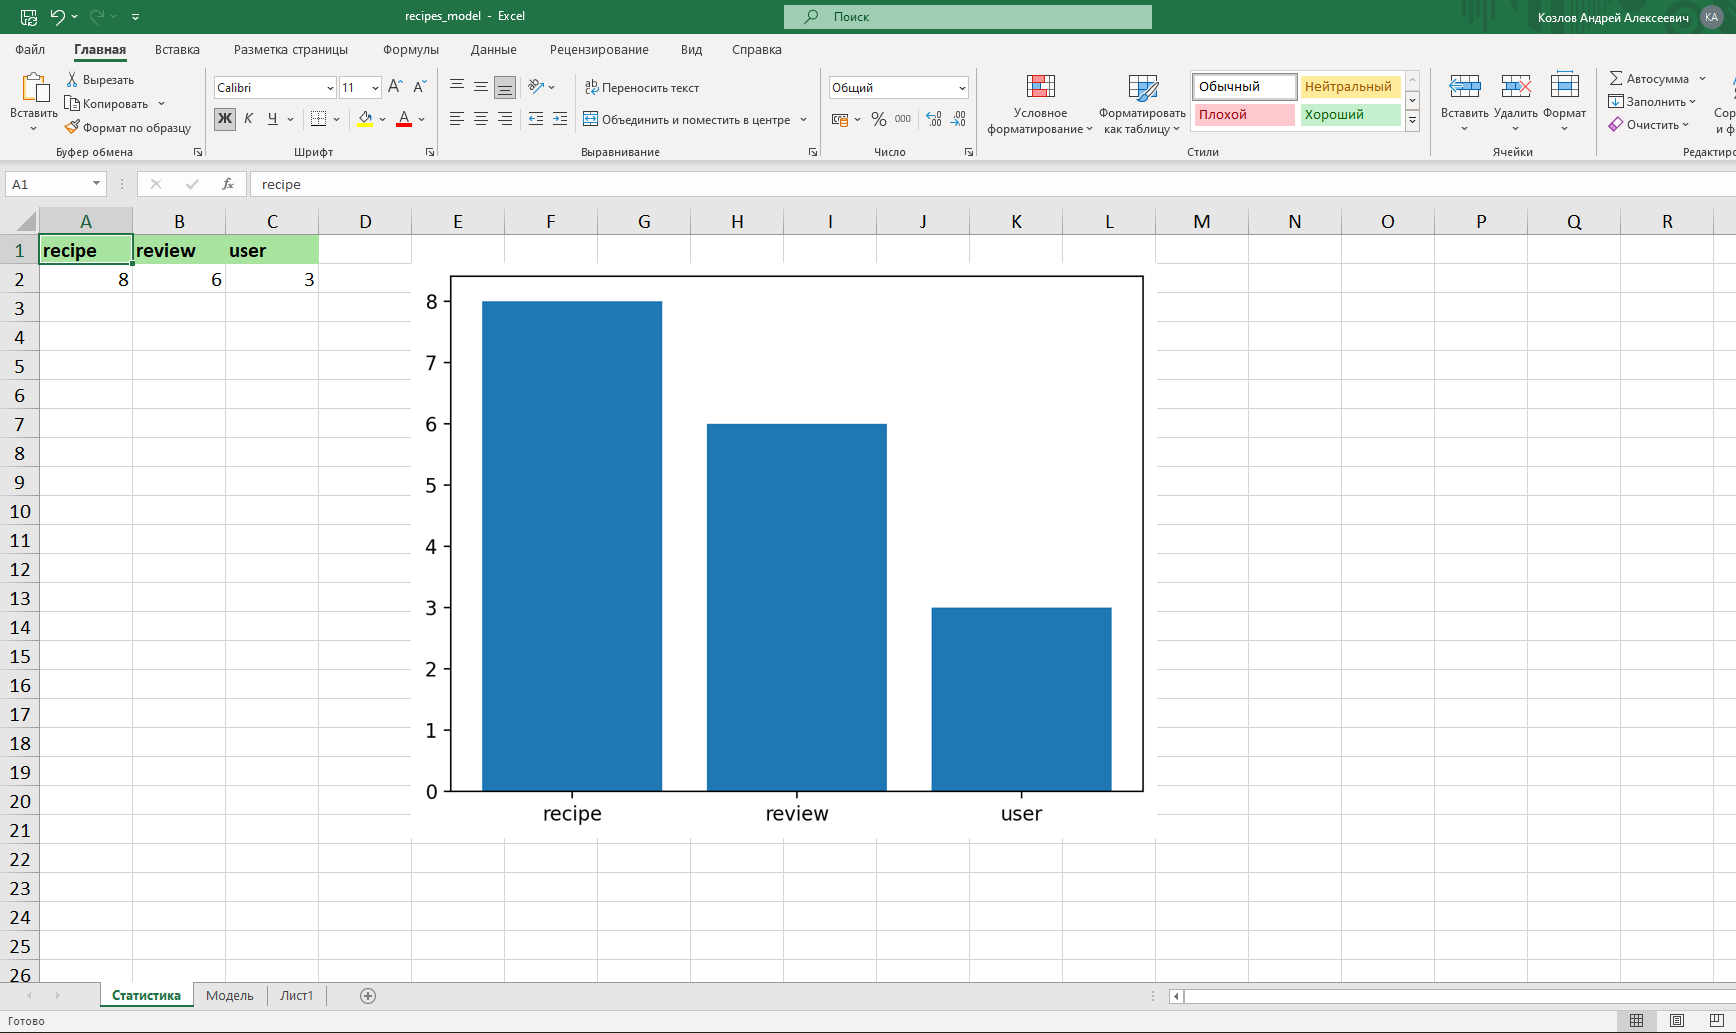